In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")
sns.axes_style("whitegrid")

#%matplotlib inline

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

In [2]:
_METRICS_FILE = './files/benchmark_pool'
_METRIC = 'kappa'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pendigitis', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv']

In [3]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_HoeffdingTree', 'MOA_LeveragingBag', 'MOA_OzaBagAdwin', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_3_Dilated_Conv_pooling', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier'])]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]

metrics = metrics[metrics['instances']>1000]

print(len(metrics.dataset.unique()), "datasets")
metrics.sample(10)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
2355,Yoga,MOA_OzaBoostAdwin,3300,426,2,0.491067,0.075367,0.009684,0.002149,0.011833,3.195777,0.709080,3.904857
1356,NonInvasiveFetalECGThorax1,MOA_HoeffdingTree,3765,750,42,0.677026,0.649630,0.025079,0.022844,0.047923,9.454915,8.612086,18.067001
774,FordA,keras_parallel_3_Dilated_Conv_pooling,4911,500,2,0.915380,0.816424,0.036629,0.012942,0.049570,18.021307,6.367340,18.021307
673,FacesUCR,MOA_OzaBagAdwin,2250,131,14,0.829476,0.799821,0.016786,0.008713,0.025499,3.776844,1.960363,5.737207
1146,Mallat,MOA_HoeffdingTree,2400,1024,8,0.944707,0.931191,0.005903,0.004869,0.010772,1.416828,1.168553,2.585380
997,InsectWingbeatSound,MOA_LeveragingBag,2200,256,11,0.644723,0.589451,0.043418,0.015677,0.059095,9.551958,3.448913,13.000871
1914,SwedishLeaf,keras_parallel_3_Dilated_Conv_pooling,1115,128,15,0.847545,0.825912,0.026063,0.017329,0.043392,2.919058,1.940794,2.919058
575,ElectricDevices,MOA_HoeffdingOptionTree,16637,96,7,0.562028,0.455576,0.000399,0.000327,0.000726,0.664403,0.543758,1.208162
485,ECG5000,MOA_HoeffdingOptionTree,5000,140,5,0.863463,0.750474,0.000481,0.000369,0.000850,0.240450,0.184304,0.424754
1333,MoteStrain,MOA_OzaBagAdwin,1272,84,2,0.875142,0.741492,0.001991,0.000852,0.002843,0.254865,0.108998,0.363863


In [4]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.sort_values(by=list(metrics_table.columns), ascending=False)
metrics_table = metrics_table[metrics_table.columns[0:]]
limits = (metrics_table.min().min()-0.05,metrics_table.max().max()+0.05)

metrics_table

classifier,keras_parallel_3_Dilated_Conv_pooling,sklearn_MLPClassifier,MOA_SingleClassifierDrift,MOA_HoeffdingTree,MOA_ASHoeffdingTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_OzaBoostAdwin,MOA_OzaBagAdwin,sklearn_SGDClassifier
dataset,,,,,,,,,,
TwoPatterns,0.999947,0.831768,0.289709,0.289709,0.289709,0.289709,0.380146,0.304429,0.281870,0.614509
CinCECGtorso,0.982306,0.981750,0.237493,0.233757,0.233757,0.233757,0.225028,0.000000,0.236487,0.221763
TwoLeadECG,0.980299,0.642916,0.545044,0.544061,0.544061,0.544061,0.536781,0.857928,0.535691,0.559434
Wafer,0.970155,0.990666,0.191710,0.356147,0.356147,0.341560,0.963474,0.959682,0.552848,0.542139
FacesUCR,0.967146,0.722795,0.841938,0.777421,0.777421,0.777421,0.860715,0.873506,0.799821,0.635126
Mallat,0.964654,0.910839,0.931191,0.931191,0.931191,0.931191,0.204766,0.216491,0.194314,0.786734
FaceAll,0.959695,0.728645,0.829490,0.735665,0.735665,0.735665,0.849261,0.868891,0.797057,0.637699
Symbols,0.951277,0.830711,0.889887,0.888874,0.888874,0.888874,0.887084,0.890289,0.878594,0.709223
ItalyPowerDemand,0.922495,0.897980,0.777878,0.915640,0.915640,0.915640,0.931874,0.917863,0.919985,0.836083


Text(0.5, 1.0, 'kappa')

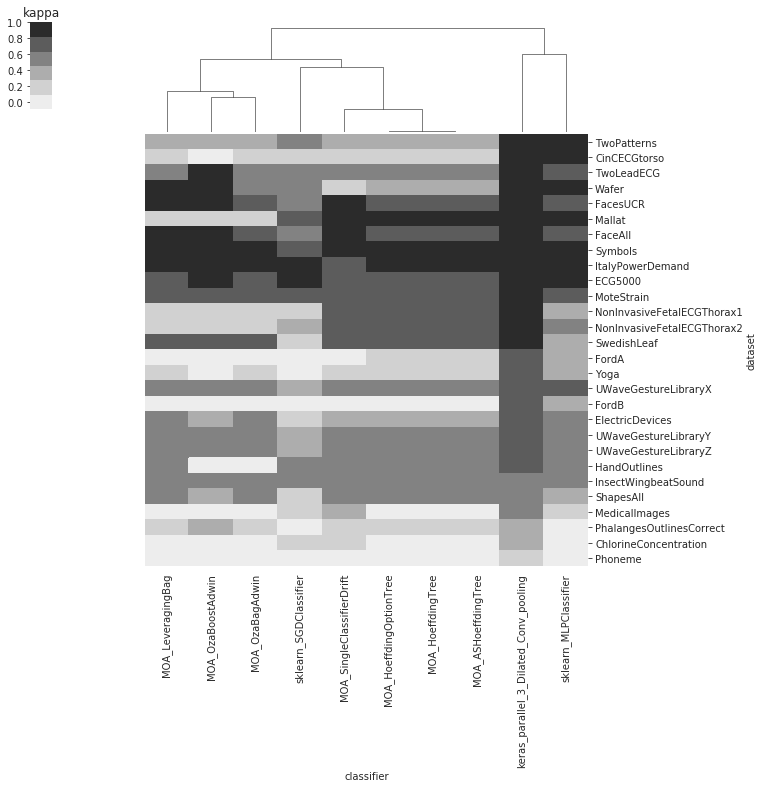

In [5]:
#sns.color_palette("BuGn")
#sns.cm.rocket_r
#sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
cm = sns.clustermap(metrics_table, figsize=(10,10), cmap=sns.color_palette("Greys"), annot=False, linewidth=0.0, row_cluster=False)
cm.cax.yaxis.tick_left()
cm.cax.yaxis.set_label_position("left")
#cm.cax.set_visible(False)
cm.cax.set_title(_METRIC)

In [6]:
sns.color_palette(n_colors=4)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

In [7]:
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
list(metrics_table.columns)
metrics_table.mean()

classifier
keras_parallel_3_Dilated_Conv_pooling    0.776488
sklearn_MLPClassifier                    0.567628
MOA_SingleClassifierDrift                0.485763
MOA_ASHoeffdingTree                      0.479961
MOA_HoeffdingTree                        0.479961
MOA_HoeffdingOptionTree                  0.479440
MOA_LeveragingBag                        0.454351
MOA_OzaBoostAdwin                        0.428401
MOA_OzaBagAdwin                          0.400692
sklearn_SGDClassifier                    0.385931
dtype: float64

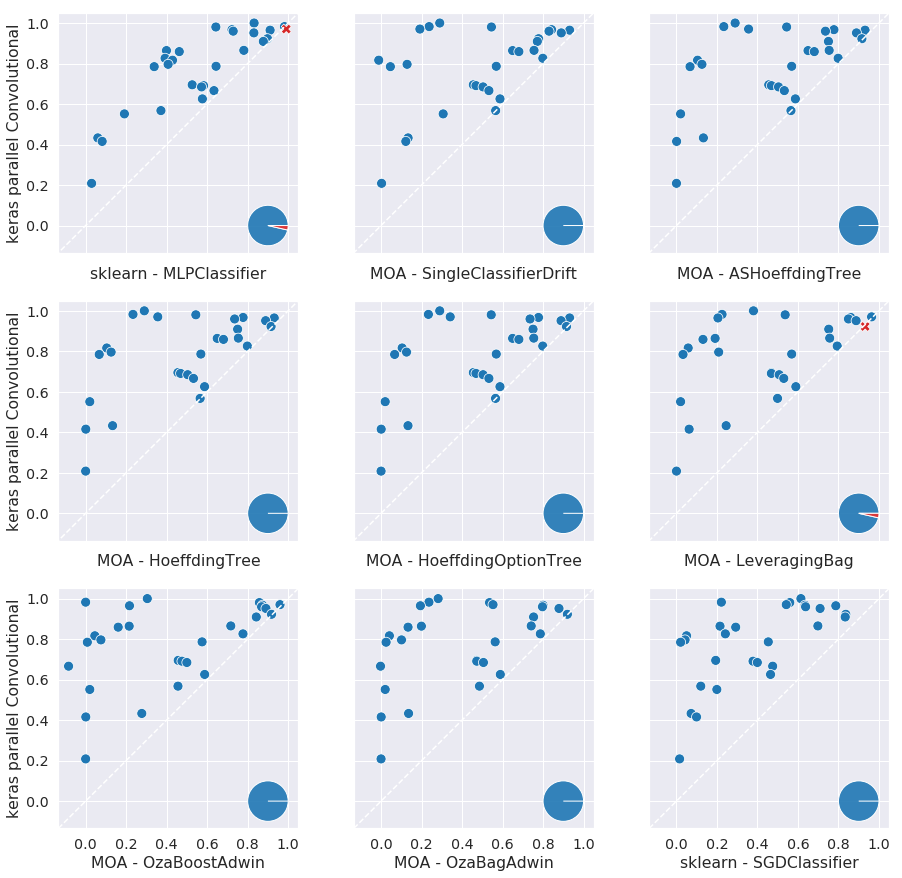

In [8]:
sns.set(font_scale=1.3)

fig, ax = plt.subplots(3,3, figsize=(15,15))
clf_name = 'keras_parallel_3_Dilated_Conv_pooling'
classifiers = metrics_table.columns[~metrics_table.columns.isin(['keras_parallel_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv_pooling'])]
metrics_table['size'] = metrics.pivot(index='dataset', columns = 'classifier', values='instances')[clf_name]

pal = {True:(0.12156862745098039, 0.4666666666666667, 0.7058823529411765) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}
#pal = {True:(0.17254901960784313, 0.6274509803921569, 0.17254901960784313) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)} 

for i in range(3):
    for j in range(3):
        
        clf = classifiers[i*3+j]
        metrics_table['diff'] = ((metrics_table[clf_name]-metrics_table[clf])>0)
        
        sns.lineplot(x=[-1,2], y=[-1,2], ax=ax[i][j], dashes=True, color='white')
        ax[i][j].lines[0].set_linestyle("--")
        sns.scatterplot(y=metrics_table[clf_name], x=metrics_table[clf], palette=pal, ax=ax[i][j],hue=metrics_table['diff'], legend=False, style = ~metrics_table['diff'], s=100 )#, size=metrics_table['size'])
    
        count_ls = [metrics_table[metrics_table['diff']]['diff'].count(),metrics_table[~metrics_table['diff']]['diff'].count()]
        patches, autotexts = ax[i][j].pie(count_ls,labeldistance=0.5, colors = ((*pal[True],0.9),(*pal[False],0.9)), frame=True, center=(0.9,0.0), radius=0.1)
        autotexts[0].set_color('white')
        autotexts[1].set_color('white')
    
        ax[i][j].set_ylabel('keras parallel Convolutional')
        ax[i][j].set_xlabel(clf.replace('_',' - '))
        ax[i][j].set_xlim(limits)
        ax[i][j].set_ylim(limits)
        if i != 2:
            ax[i][j].set_xticklabels([])
        if j != 0:
            ax[i][j].set_ylabel('')
            ax[i][j].set_yticklabels([])

del metrics_table['size'], metrics_table['diff']         
sns.set(font_scale=1)

In [9]:
classifiers

Index(['sklearn_MLPClassifier', 'MOA_SingleClassifierDrift',
       'MOA_ASHoeffdingTree', 'MOA_HoeffdingTree', 'MOA_HoeffdingOptionTree',
       'MOA_LeveragingBag', 'MOA_OzaBoostAdwin', 'MOA_OzaBagAdwin',
       'sklearn_SGDClassifier'],
      dtype='object', name='classifier')

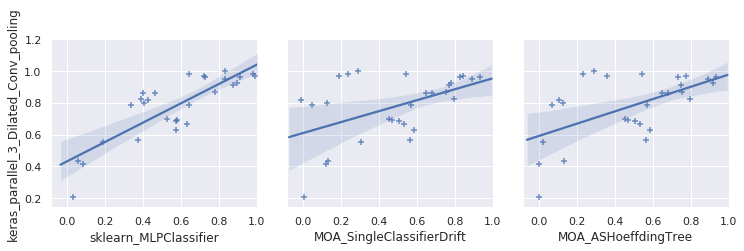

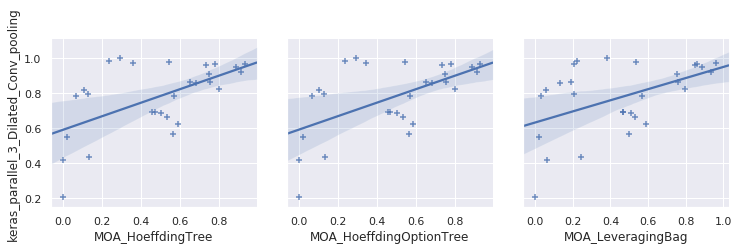

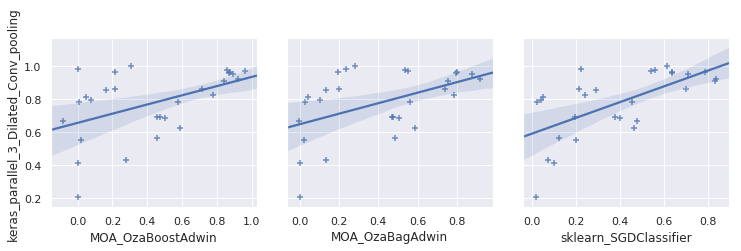

In [10]:
#fig, ax = plt.subplots(331, figsize=(20,20))

g0 = sns.pairplot(height=3.5,kind="reg",markers='+',y_vars = ['keras_parallel_3_Dilated_Conv_pooling'] ,x_vars =metrics_table.columns[metrics_table.columns != 'keras_parallel_3_Dilated_Conv_pooling'][0:3], data = metrics_table)
g1 = sns.pairplot(height=3.5,kind="reg",markers='+',y_vars = ['keras_parallel_3_Dilated_Conv_pooling'] ,x_vars =metrics_table.columns[metrics_table.columns != 'keras_parallel_3_Dilated_Conv_pooling'][3:6], data = metrics_table)
g2 = sns.pairplot(height=3.5,kind="reg",markers='+',y_vars = ['keras_parallel_3_Dilated_Conv_pooling'] ,x_vars =metrics_table.columns[metrics_table.columns != 'keras_parallel_3_Dilated_Conv_pooling'][6:9], data = metrics_table)

min_v = metrics_table.min().min()
max_v = metrics_table.max().max()
for i in range(3):
    g0.axes[0,i].set_xlim((min_v,max_v))
#g.axes[1,2].set_xlim((-20,20))